....F
FAIL: test_object_corruption (__main__.TestSignalDetection)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Tommie\AppData\Local\Temp\ipykernel_22680\2871816129.py", line 65, in test_object_corruption
    self.assertAlmostEqual(obtained, expected, places=6)
AssertionError: 0.5344398714281623 != 0.0 within 6 places (0.5344398714281623 difference)

----------------------------------------------------------------------
Ran 5 tests in 0.412s

FAILED (failures=1)
.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK
......
----------------------------------------------------------------------
Ran 6 tests in 0.005s

OK


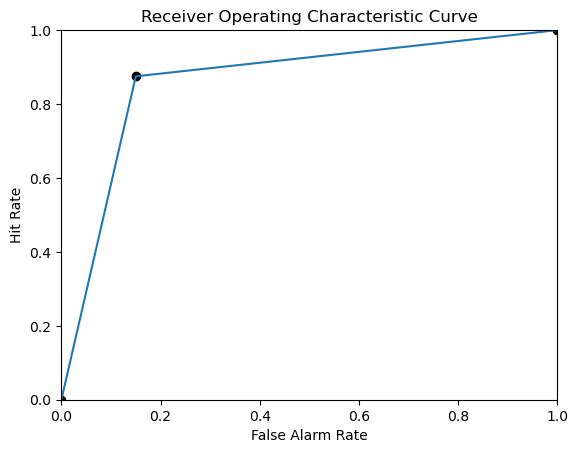

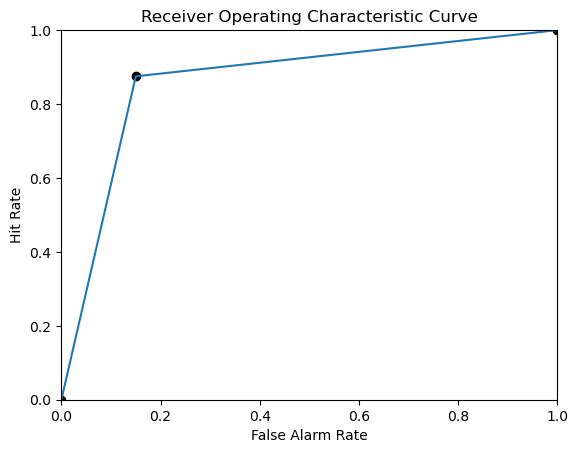

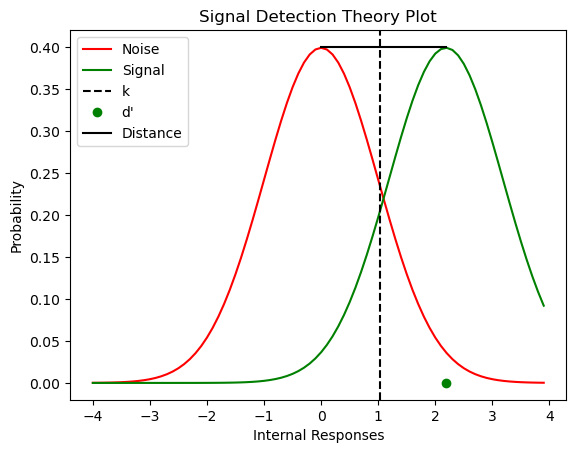

In [1]:
import numpy as np
import scipy as spi
import unittest
import matplotlib.pyplot as plt

## Creating a non-smelly version of the SDT class

class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.hits = hits
        self.misses = misses
        self.false_alarms = false_alarms
        self.correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.hits / (self.hits + self.misses))

    def false_alarm_rate(self):
        return (self.false_alarms / (self.false_alarms + self.correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))
 
## Writing a Unit Test to corrupt the object

class TestSignalDetection(unittest.TestCase):
    def test_d_prime_zero(self):
        sd   = SignalDetection(15, 5, 15, 5)
        expected = 0
        obtained = sd.d_prime()
        # Compare calculated and expected d-prime
        self.assertAlmostEqual(obtained, expected, places=6)
    def test_d_prime_nonzero(self):
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.421142647060282
        obtained = sd.d_prime()
        # Compare calculated and expected d-prime
        self.assertAlmostEqual(obtained, expected, places=6)
    def test_criterion_zero(self):
        sd   = SignalDetection(5, 5, 5, 5)
        # Calculate expected criterion        
        expected = 0
        obtained = sd.criterion()
        # Compare calculated and expected criterion
        self.assertAlmostEqual(obtained, expected, places=6)
    def test_criterion_nonzero(self):
        sd   = SignalDetection(15, 10, 15, 5)
        # Calculate expected criterion        
        expected = -0.463918426665941
        obtained = sd.criterion()
        # Compare calculated and expected criterion
        self.assertAlmostEqual(obtained, expected, places=6)
    def test_object_corruption(self):
        sd   = SignalDetection(15, 5, 15, 5)
        expected = sd.d_prime()
        sd.hits = 1500
        sd.misses = 1222
        sd.false_alarms = 1115
        sd.correct_rejections = 2142
        obtained = sd.d_prime()
        # Compare original and corrupted d-prime
        self.assertAlmostEqual(obtained, expected, places=6)

if __name__ == '__main__':
    unittest.main(argv=['ignored'], exit=False)


## Refactoring the SDT class to prevent objects from being corrupted

class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.__hits = hits
        self.__misses = misses
        self.__false_alarms = false_alarms
        self.__correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.__hits / (self.__hits + self.__misses))

    def false_alarm_rate(self):
        return (self.__false_alarms / (self.__false_alarms + self.__correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))

## Running the test again to see if the objects are non-corruptable now

import unittest
import numpy as np
import matplotlib.pyplot as plt

class TestSignalDetection(unittest.TestCase):
    def test_d_prime_zero(self):
        sd   = SignalDetection(15, 5, 15, 5)
        expected = 0
        obtained = sd.d_prime()
        # Compare calculated and expected d-prime
        self.assertAlmostEqual(obtained, expected, places=6)
    def test_d_prime_nonzero(self):
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.421142647060282
        obtained = sd.d_prime()
        # Compare calculated and expected d-prime
        self.assertAlmostEqual(obtained, expected, places=6)
    def test_criterion_zero(self):
        sd   = SignalDetection(5, 5, 5, 5)
        # Calculate expected criterion        
        expected = 0
        obtained = sd.criterion()
        # Compare calculated and expected criterion
        self.assertAlmostEqual(obtained, expected, places=6)
    def test_criterion_nonzero(self):
        sd   = SignalDetection(15, 10, 15, 5)
        # Calculate expected criterion        
        expected = -0.463918426665941
        obtained = sd.criterion()
        # Compare calculated and expected criterion
        self.assertAlmostEqual(obtained, expected, places=6)
    def test_object_corruption(self):
        sd   = SignalDetection(15, 5, 15, 5)
        expected = sd.d_prime()
        sd.__hits = 1824
        sd.__misses = 1248
        sd.__false_alarms = 1248
        sd.__correct_rejections = 2142
        obtained = sd.d_prime()
        # Compare original and corrupted d-prime
        self.assertAlmostEqual(obtained, expected, places=6)

if __name__ == '__main__':
    unittest.main(argv=['ignored'], exit=False)

## Overloading operators 

class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.__hits = hits
        self.__misses = misses
        self.__false_alarms = false_alarms
        self.__correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.__hits / (self.__hits + self.__misses))

    def false_alarm_rate(self):
        return (self.__false_alarms / (self.__false_alarms + self.__correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))
    
    def __add__(self, other):
        return SignalDetection(self.__hits + other.__hits, self.__misses + other.__misses, self.__false_alarms + other.__false_alarms, self.__correct_rejections + other.__correct_rejections)
    
    def __mul__(self, scalar):
        return SignalDetection(self.__hits * scalar, self.__misses * scalar, self.__false_alarms * scalar, self.__correct_rejections * scalar)

# Testing the operators
class TestSignalDetection(unittest.TestCase):

    def test_d_prime_zero(self):
        sd   = SignalDetection(15, 5, 15, 5)
        expected = 0
        obtained = sd.d_prime()
        # Compare calculated and expected d-prime
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_d_prime_nonzero(self):
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.421142647060282
        obtained = sd.d_prime()
        # Compare calculated and expected d-prime
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_zero(self):
        sd   = SignalDetection(5, 5, 5, 5)
        # Calculate expected criterion
        expected = 0
        obtained = sd.criterion()
        # Compare calculated and expected criterion
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_nonzero(self):
        sd   = SignalDetection(15, 10, 15, 5)
        # Calculate expected criterion
        expected = -0.463918426665941
        obtained = sd.criterion()
        # Compare calculated and expected criterion
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_addition(self):
        sd = SignalDetection(1, 1, 2, 1) + SignalDetection(2, 1, 1, 3)
        expected = SignalDetection(3, 2, 3, 4).criterion()
        obtained = sd.criterion()
        # Compare calculated and expected criterion
        self.assertEqual(obtained, expected)

    def test_multiplication(self):
        sd = SignalDetection(1, 2, 3, 1) * 4
        expected = SignalDetection(4, 8, 12, 4).criterion()
        obtained = sd.criterion()
        # Compare calculated and expected criterion
        self.assertEqual(obtained, expected)

if __name__ == '__main__':
    unittest.main(argv=['ignored'], exit=False)

## Adding plot_roc() method to the SDT class

class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.__hits = hits
        self.__misses = misses
        self.__false_alarms = false_alarms
        self.__correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.__hits / (self.__hits + self.__misses))

    def false_alarm_rate(self):
        return (self.__false_alarms / (self.__false_alarms + self.__correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))
    
    def __add__(self, other):
        return SignalDetection(self.__hits + other.__hits, self.__misses + other.__misses, self.__false_alarms + other.__false_alarms, self.__correct_rejections + other.__correct_rejections)
    
    def __mul__(self, scalar):
        return SignalDetection(self.__hits * scalar, self.__misses * scalar, self.__false_alarms * scalar, self.__correct_rejections * scalar)
    
    def plot_roc(self):
        plt.plot(0,0, 'o', color = 'black')
        plt.plot(1,1, 'o', color = 'black')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xlabel("False Alarm Rate")
        plt.ylabel("Hit Rate")
        plt.title("Receiver Operating Characteristic Curve")
        x = [0]
        y = [0]
        x.append(self.false_alarm_rate())
        y.append(self.hit_rate())
        plt.plot(self.false_alarm_rate(), self.hit_rate(), 'o', color = 'black')
        x.append(1)
        y.append(1)
        plt.plot(x,y, '-')
        plt.show()
        
sdt = SignalDetection(14,2,3,17)
sdt.plot_roc()

## Adding plot_sdt() to the SDT class

class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.__hits = hits
        self.__misses = misses
        self.__false_alarms = false_alarms
        self.__correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.__hits / (self.__hits + self.__misses))

    def false_alarm_rate(self):
        return (self.__false_alarms / (self.__false_alarms + self.__correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))
    
    def __add__(self, other):
        return SignalDetection(self.__hits + other.__hits, self.__misses + other.__misses, self.__false_alarms + other.__false_alarms, self.__correct_rejections + other.__correct_rejections)
    
    def __mul__(self, scalar):
        return SignalDetection(self.__hits * scalar, self.__misses * scalar, self.__false_alarms * scalar, self.__correct_rejections * scalar)
    
    def plot_roc(self):
        plt.plot(0,0, 'o', color = 'black')
        plt.plot(1,1, 'o', color = 'black')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xlabel("False Alarm Rate")
        plt.ylabel("Hit Rate")
        plt.title("Receiver Operating Characteristic Curve")
        x = [0]
        y = [0]
        x.append(self.false_alarm_rate())
        y.append(self.hit_rate())
        plt.plot(self.false_alarm_rate(), self.hit_rate(), 'o', color = 'black')
        x.append(1)
        y.append(1)
        plt.plot(x,y, '-')
        plt.show()
    

    def plot_sdt(self):
        noise_x = np.arange(-4, 4, 0.1)
        noise_y = spi.stats.norm.pdf(noise_x, 0, 1)
        signal_x = np.arange(-4, 4, 0.1)
        signal_y = spi.stats.norm.pdf(noise_x, self.d_prime(), 1)
        plt.plot(noise_x, noise_y, label = "Noise", color = 'red')
        plt.plot(signal_x, signal_y, label = "Signal", color = 'green')
        plt.axvline(x = ((self.d_prime() / 2) + self.criterion()), label = "k", color = 'black', linestyle = '--')
        plt.plot(self.d_prime(), 0, 'o', label = 'd\'', color = 'green')
        x_distance = [0, self.d_prime()]
        y_distance = [0.4, 0.4]
        plt.plot(x_distance, y_distance, '-', label = "Distance", color = 'black')
        plt.title("Signal Detection Theory Plot")
        plt.xlabel("Internal Responses")
        plt.ylabel("Probability")
        plt.legend()
        plt.show()

sdt = SignalDetection(14,2,3,17)
sdt.plot_roc()
sdt.plot_sdt()